In [4]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.special import genlaguerre as L

Using eqns 2.11 and 2.13 from Lange dissertation with $kT-> \sum_p(1/2+\bar{n}_p)\hbar\omega_p = \langle E\rangle$

2.11:
$\frac{\Delta \nu_D}{\nu_0} = -\left( \frac{3k_BT_D}{mc^2} + \frac{1}{4}\left(\frac{\beta \Omega_{rf}}{2\pi\nu_0\cos\theta}\right)^2 \right)$

2.13:
$\frac{\Delta \nu_{QS}}{\nu_0} = -\frac{\Delta\alpha_S^{dc}}{h\nu_0} \left( \frac{3k_BT_Dm\Omega_{rf}}{2e^2} +\left( \frac{\beta m \Omega_{rf}^2c}{4\pi\nu_0e\cos\theta}\right)^2\right)$

Then from Sam's Al+ clock paper,

Eqn. 3:
$\frac{\Delta \nu}{\nu} = \sum_p{\left( \frac{\Delta \nu_p}{\nu}\right)} \left[ \left(\frac{1}{2} +\bar{n}_{p,0} \right) +\frac{1}{2}\dot{\bar{n}}_pt_i \right]$

2.11:
$\frac{\Delta \nu_D}{\nu_0} = -\left( \frac{3\hbar\omega\left(\bar{n}+1/2\right)}{mc^2} + \frac{1}{4}\left(\frac{\beta \Omega_{rf}}{2\pi\nu_0\cos\theta}\right)^2 \right)$

$\frac{\Delta \nu_{QS}}{\nu_0} = -\frac{\Delta\alpha_S^{dc}}{h\nu_0} \left( \frac{3\hbar\omega m\Omega_{rf}\left(\bar{n}+1/2\right)}{2e^2} +\left( \frac{\beta m \Omega_{rf}^2c}{4\pi\nu_0e\cos\theta}\right)^2\right)$

In [5]:
Ncut = 200
nbar = 1.0
hbar = sp.constants.hbar
h = sp.constants.h
c = sp.constants.c
e = sp.constants.e
eVtoJ = 1.602176634e-19
amutokg = 1.66053906660e-27

omega = 2.0*np.pi*778e3 #Lange
Omegarf = 2.0*np.pi*13e6/0.5 #Lange
m = 170.936331517*amutokg
beta = 0.0
alpha = 5.89e-40 #J m^2 V^-2 E2 transition (Lange)
nu0 = 688358979309307.82 #Hz E2 transition (Huntemann)

In [6]:
def prob(n,nbar):
    return 1.0/(nbar+1)*(nbar/(nbar+1))**n

def expE(nbar, omega, Ncut):
    expE = 0.0
    #Ncut = 1001
    for n in range(Ncut):
        expE += prob(n,nbar)*hbar*omega*(0.5+n)
    return expE

def expEHeat(nbar0, nbarf, omega, Ncut):
    return expE((nbar0+nbarf)/2.0, omega, Ncut)

def expE3D(nbar, omegas, Ncut):
    #Ncut = 1001
    expEx = 0.0
    expEy = 0.0
    expEz = 0.0
    for n in range(Ncut):
        expEx += prob(n,nbar)*hbar*omegas[0]*(0.5+n)
        expEy += prob(n,nbar)*hbar*omegas[1]*(0.5+n)
        expEz += prob(n,nbar/2.0)*hbar*omegas[2]*(0.5+n)
    return expEx + expEy + expEz

def expEHeat3D(nbar, omegas, nbarDots, t):
    expEx = expEHeat(nbar, omegas[0], nbarDots[0], t)
    expEy = expEHeat(nbar, omegas[1], nbarDots[1], t)
    expEz = expEHeat(nbar/2.0, omegas[2], nbarDots[2], t)
    return expEx + expEy + expEz

def expR2(nbar, omega, Ncut):
    expR = 0.0
    for n in range(Ncut):
        expR += prob(n,nbar)*(2.0*n + 1.0)
    return expR#*hbar/(2.0*m*omega)

In [7]:
pts = 20
nbars = np.linspace(0, 40, pts)
expR2s = np.zeros(pts)
for ii in range(pts):
    expR2s[ii] = expR2(nbars[ii], omega, 401)

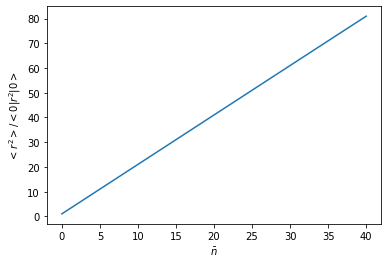

In [12]:
plt.plot(nbars, expR2s)
plt.ylabel(r"$< r^2 > / < 0| r^2 | 0 >$")
plt.xlabel(r"$\bar{n}$")
plt.show()

In [72]:
nbarfs = np.linspace(0, 15, 100)
Ncut = 501
nbar0 = 10.0
shifts = -expE(nbarPts, omega, Ncut)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

#shiftHeats = -expEHeat(nbars, omega, 5.0, 0.5e-3)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

omegas = [omega]*3

shift3Ds = -expE3D(nbarPts, omegas, Ncut)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

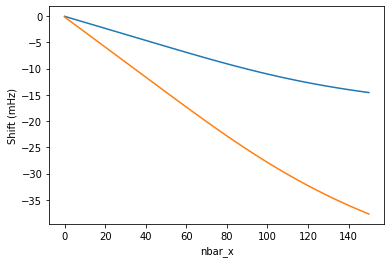

In [73]:
plt.plot(nbarPts,shifts*nu0*1.0e3)
plt.plot(nbarPts,shift3Ds*nu0*1.0e3)

#plt.plot(nbars,shiftHeats*nu0*1.0e3)
plt.xlabel("nbar_x")
plt.ylabel("Shift (mHz)")
plt.show()

In [93]:

#shiftHeats = -expEHeat(nbars, omega, 5.0, 0.5e-3)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

#omegas = [omega]*3|

#shift3D1s = -expE3D(nbarPts, omegas, Ncut)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

ValueError: x and y must have same first dimension, but have shapes (15,) and (100,)

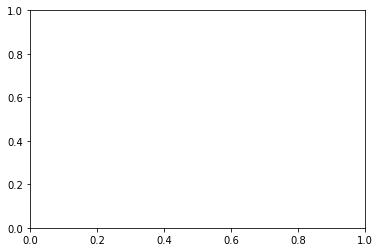

In [75]:
plt.plot(nbarPts,shifts*nu0*1.0e3)
plt.plot(nbarPts,shift1s*nu0*1.0e3)

#plt.plot(nbars,shiftHeats*nu0*1.0e3)
plt.xlabel("nbar_x")
plt.ylabel("Shift (mHz)")
plt.show()

Ncut convergence test:

In [76]:
pts = 15
nbarPts = np.linspace(10, 150, pts)
Ncuts = np.array([1201])
shifts = np.zeros([np.size(Ncuts), pts])
shift3Ds = np.zeros([np.size(Ncuts), pts])
omegas = [omega]*3

for ii in range(np.size(Ncuts)):
    for jj in range(pts):
        shifts[ii][jj] = -expE(nbarPts[jj], omega, Ncuts[ii])*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))
        shift3Ds[ii][jj] = -expE3D(nbarPts[jj], omegas, Ncuts[ii])*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))

ValueError: x and y must have same first dimension, but have shapes (15,) and (100,)

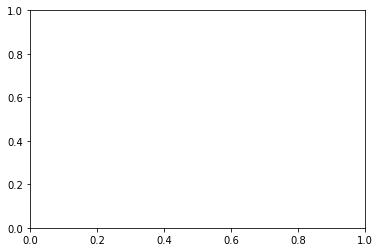

In [35]:
plt.plot(nbarPts,shift1s[0,:]*nu0*1.0e3, label="Ncut=201")
plt.plot(nbarPts,shift1s[1,:]*nu0*1.0e3, label="Ncut=401")
plt.plot(nbarPts,shift1s[2,:]*nu0*1.0e3, label="Ncut=601")
plt.plot(nbarPts,shift1s[3,:]*nu0*1.0e3, label="Ncut=801")
plt.plot(nbarPts,shift1s[4,:]*nu0*1.0e3, label="Ncut=1001")
plt.plot(nbarPts,shift1s[4,:]*nu0*1.0e3, label="Ncut=1201")

plt.xlabel("nbar_x")
plt.ylabel("Shift (mHz)")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Converged 2nd Order Doppler and DC Stark Shift ')

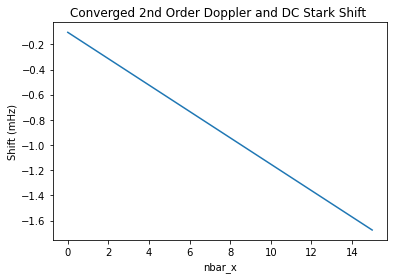

In [44]:
nbarPts = np.linspace(0, 15, 50)
Omegarf = 2.0*np.pi*13e6/0.55 #Lange
Ncut = 1201
nbar0 = 0.0
shifts = -expEHeat(nbar0, nbarPts, omega, Ncut)*(3.0/(m*c**2) + (alpha/(h*nu0))*(3.0*m*Omegarf**2/(2.0*e**2)))
plt.plot(nbarPts,shifts*nu0*1.0e3, label="Ncut=1201")

plt.xlabel("nbar_x")
plt.ylabel("Shift (mHz)")
plt.title("Converged 2nd Order Doppler and DC Stark Shift ")

In [103]:
%store shifts

Stored 'shifts' (ndarray)


In [104]:
%store nbarPts

Stored 'nbarPts' (ndarray)


In [105]:
%store nu0

Stored 'nu0' (float)


In [100]:
shift2s*nu0*1e3

array([ -2.19835217,  -3.24518654,  -4.29202091,  -5.33885528,
        -6.38568965,  -7.43252402,  -8.47935838,  -9.52619275,
       -10.57302711, -11.61986138, -12.66669523, -13.71352734,
       -14.76035396, -15.80716597, -16.85394437])

In [81]:
7.44138557/17.12024083

0.4346542577228453

In [82]:
(-0.97062063+7.44138557)/140

0.04621974957142857

In [85]:
(-0.04621974957142857+0.122097983)/0.122097983

0.6214536191688885

In [5]:
nbar = 10.0
ns = np.linspace(0,100,100)
probs1 = prob(ns,10.0)
probs2 = prob(ns,20.0)
probs3 = prob(ns,50.0)

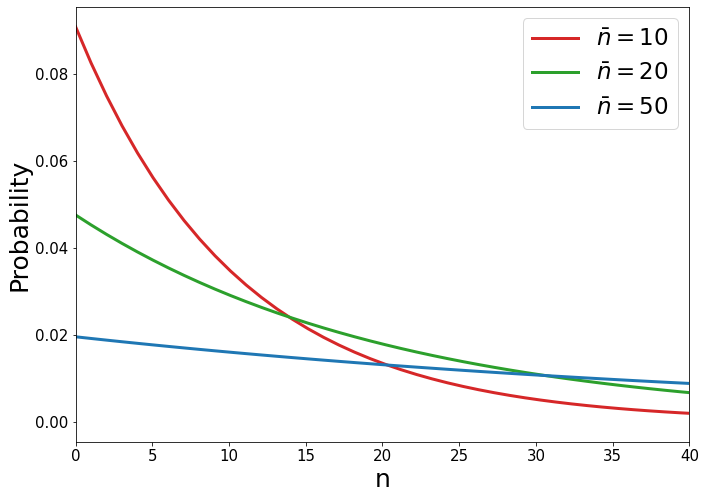

In [8]:
plt.figure(figsize=(11,8))
plt.plot(ns,probs1, label=r'$\bar{n} = 10$', linewidth=3, color="tab:red")
plt.plot(ns,probs2, label=r'$\bar{n} = 20$', linewidth=3, color="tab:green")
plt.plot(ns,probs3, label=r'$\bar{n} = 50$', linewidth=3, color="tab:blue")
plt.xlim([0,40])
plt.xlabel("n",fontsize="25")
plt.ylabel("Probability",fontsize="25")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize="23")
plt.show()
